In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")


In [3]:
df_dummies=pd.get_dummies(df)

In [4]:
del df_dummies["y_no"]
del df_dummies["duration"]

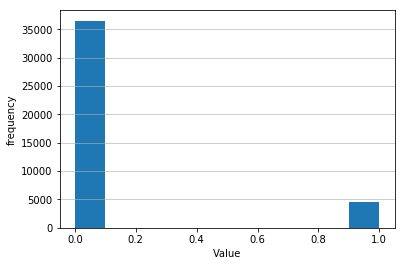

In [5]:
n, bins, patches = plt.hist(x=df_dummies["y_yes"])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('frequency')
plt.savefig("histogramLab3.png",bbox_inches='tight')

In [6]:
y_df=df_dummies["y_yes"]
del df_dummies["y_yes"]
X_df=df_dummies

X = X_df.values
y = y_df.values.T

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators = 100,max_depth = 4)
dummy_clf = DummyClassifier()
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))

dummy_clf.fit(X,y)
print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f"% (acc(y,dummy_clf.predict(X))))

ACC: 0.82 (+/- 0.14)
Dummy ACC: 0.80


In [8]:
clf = ExtraTreesClassifier(n_estimators = 100,max_depth = 4)
clf.fit(X,y)

print(acc(y,clf.predict(X)))

0.8993638923958435


In [9]:
features=list(df_dummies)

[ 2 61  7  8  4  6 60 49 42 50 52  5 43  3 53 48 59 44 34 14 33 17 47 10
 46 55 51 27 45 23  0  1 31 22 20 54 32 58 57  9 15 11 16 18 21 41 38 56
 28 40 12 39 29 24 25 37 36 26 30 13 19 35]
Feature ranking:
1. pdays (0.238889)
2. poutcome_success (0.149433)
3. euribor3m (0.136161)
4. nr.employed (0.112018)
5. emp.var.rate (0.083839)
6. cons.conf.idx (0.032698)
7. poutcome_nonexistent (0.028489)
8. month_mar (0.028066)
9. contact_cellular (0.025026)
10. month_may (0.022720)
11. month_oct (0.022215)
12. cons.price.idx (0.020044)
13. contact_telephone (0.016501)
14. previous (0.014331)
15. month_sep (0.009676)
16. month_jun (0.008243)
17. poutcome_failure (0.007317)
18. month_apr (0.005841)
19. default_unknown (0.005517)
20. job_retired (0.005368)
21. default_no (0.004675)
22. job_student (0.003460)
23. month_jul (0.003070)
24. job_blue-collar (0.002112)
25. month_dec (0.002073)
26. day_of_week_mon (0.002069)
27. month_nov (0.001831)
28. education_basic.9y (0.001096)
29. month_aug (0.0009

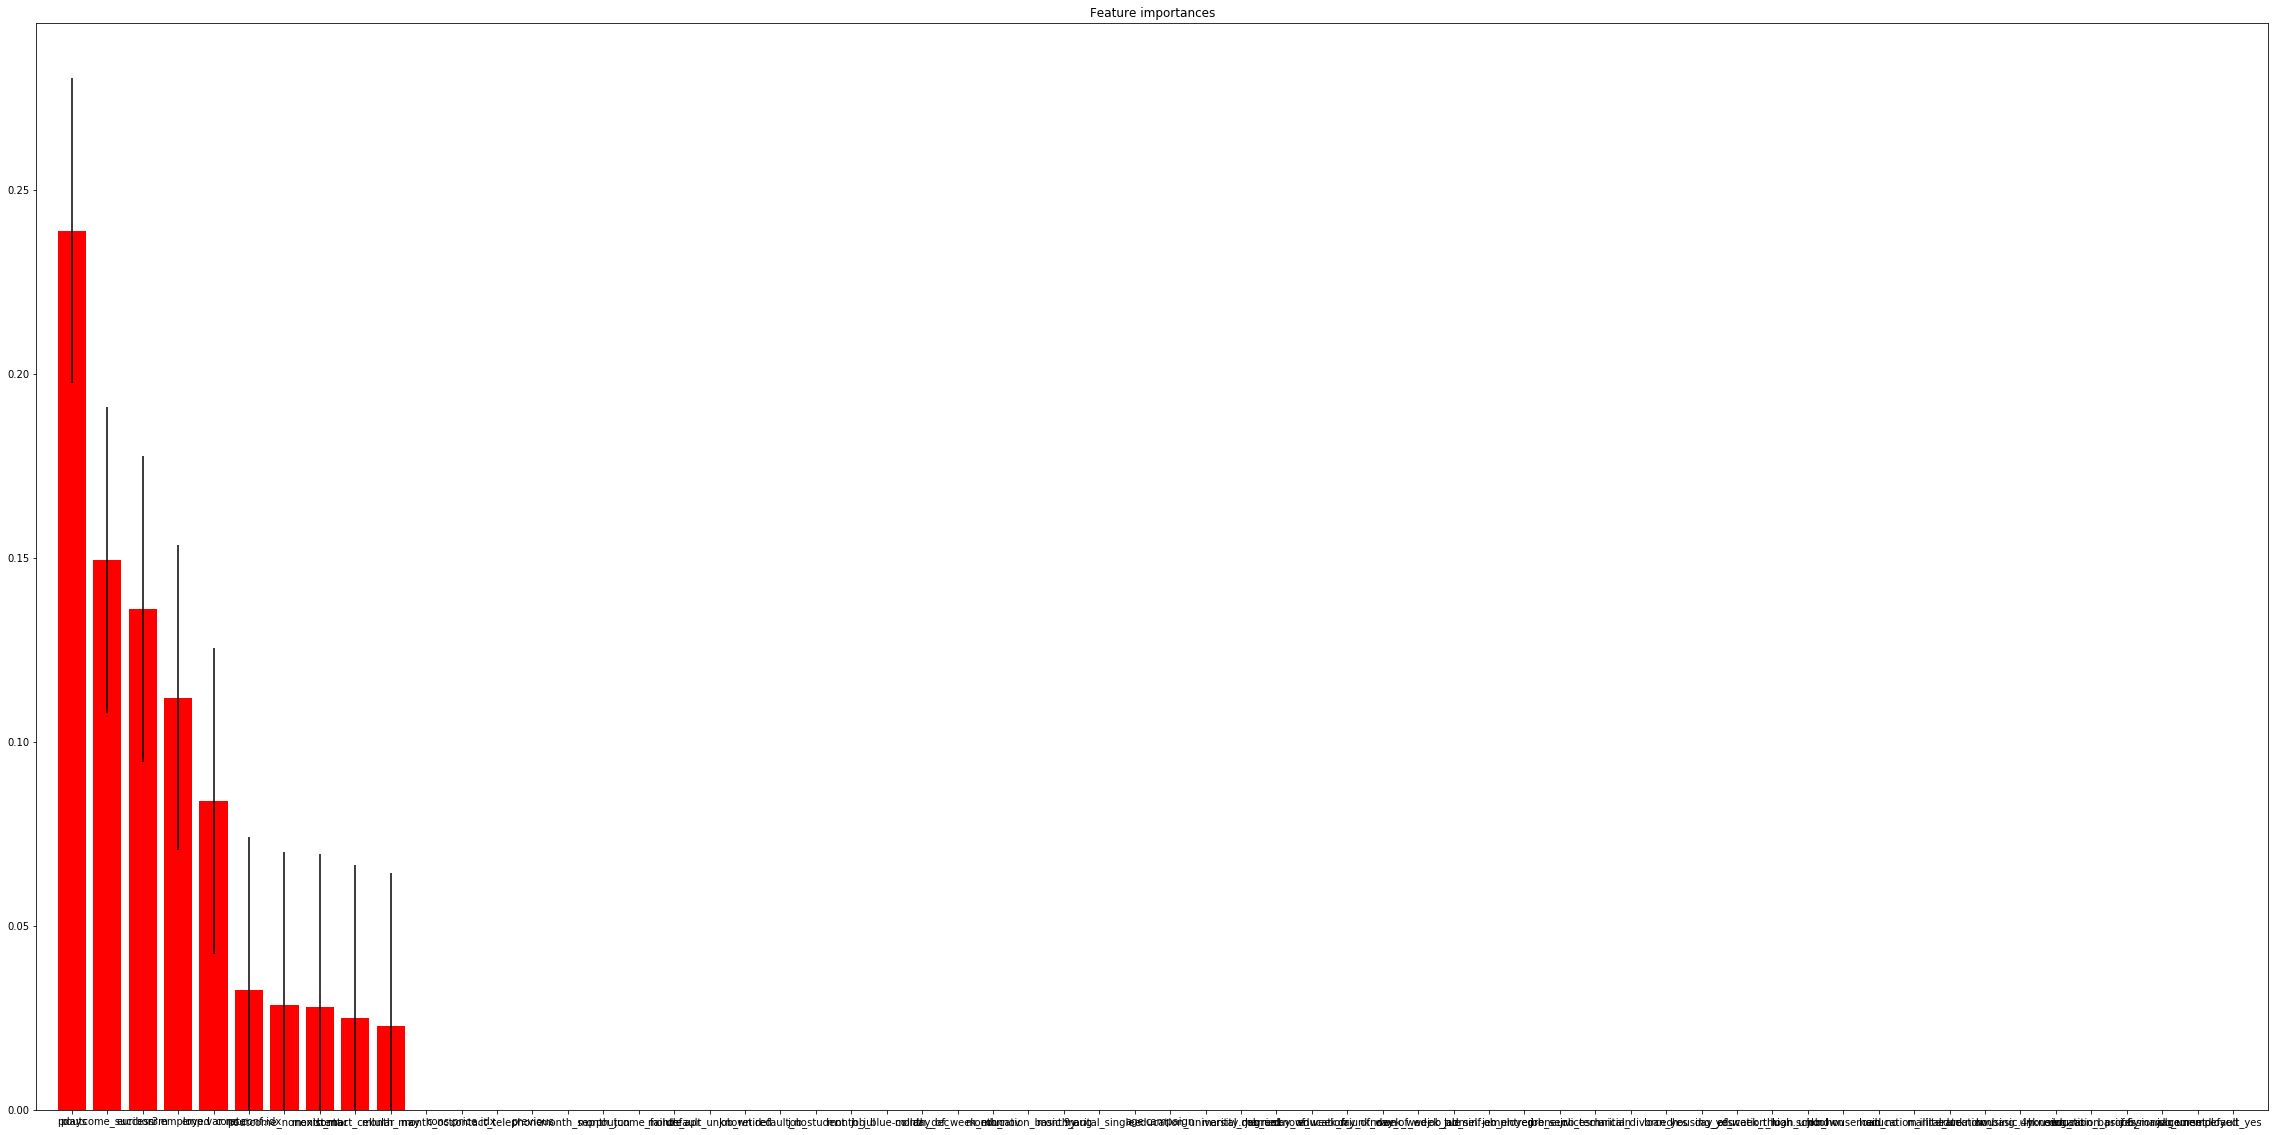

In [10]:
#features importances
importances = clf.feature_importances_
std = np.std(importances)#decision tree only has one importance
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")  # just the top 10 features
num_feat_to_plot = 10
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]],
       color="r", yerr=std, align="center") #only one
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(40,20)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importancesLab3.png",bbox_inches='tight')
#plt.savefig("importances.pdf",bbox_inches='tight')

Normalized confusion matrix


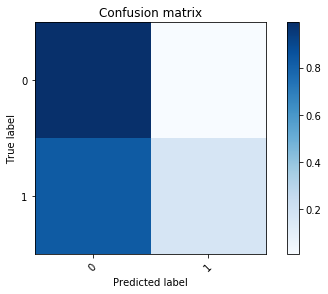

In [11]:
#confusion
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusionLab3.png",bbox_inches='tight')
#plt.savefig("confusion.pdf",bbox_inches='tight')